#### 데이터 다운받기
- 행정안전부 홈페이지
- 정책자료 -> 주민등록 인구통계 -> 연령별 인구현황
- 전국 - 시군구 - 전체 - 월간 - 계 - 1세 - 0세 - 100세 이상
- 전체읍면동현황 - .csv 파일 다운로드

In [1]:
import csv

a = open("./연령별인구현황_월간.csv", "r", encoding="cp949")
data = csv.reader(a)

for i in data:
    print(i)

a.close()

['행정구역', '2026년01월_계_총인구수', '2026년01월_계_연령구간인구수', '2026년01월_계_0세', '2026년01월_계_1세', '2026년01월_계_2세', '2026년01월_계_3세', '2026년01월_계_4세', '2026년01월_계_5세', '2026년01월_계_6세', '2026년01월_계_7세', '2026년01월_계_8세', '2026년01월_계_9세', '2026년01월_계_10세', '2026년01월_계_11세', '2026년01월_계_12세', '2026년01월_계_13세', '2026년01월_계_14세', '2026년01월_계_15세', '2026년01월_계_16세', '2026년01월_계_17세', '2026년01월_계_18세', '2026년01월_계_19세', '2026년01월_계_20세', '2026년01월_계_21세', '2026년01월_계_22세', '2026년01월_계_23세', '2026년01월_계_24세', '2026년01월_계_25세', '2026년01월_계_26세', '2026년01월_계_27세', '2026년01월_계_28세', '2026년01월_계_29세', '2026년01월_계_30세', '2026년01월_계_31세', '2026년01월_계_32세', '2026년01월_계_33세', '2026년01월_계_34세', '2026년01월_계_35세', '2026년01월_계_36세', '2026년01월_계_37세', '2026년01월_계_38세', '2026년01월_계_39세', '2026년01월_계_40세', '2026년01월_계_41세', '2026년01월_계_42세', '2026년01월_계_43세', '2026년01월_계_44세', '2026년01월_계_45세', '2026년01월_계_46세', '2026년01월_계_47세', '2026년01월_계_48세', '2026년01월_계_49세', '2026년01월_계_50세', '2026년01월_계_51세', '2026년01월_계_52세', '2026년

#### 데이터 분석

In [ ]:
import csv
import numpy as np

a = open("./연령별인구현황_월간.csv", "r", encoding="cp949")
data = csv.reader(a)

name = input("원하는 지역 : ")

for i in data:
    if name in i[0]: # 행정구역
        num = np.array(i[3:], dtype=int) # 0세부터 100세 이상까지의 인구 수
        break
print(num)
a.close()

[241 203 201 239 210 237 257 298 328 357 452 436 426 507 473 455 457 443
 430 440 383 356 359 321 376 420 390 368 408 386 449 465 487 497 475 453
 473 420 449 458 420 542 573 655 692 704 677 603 645 602 598 688 685 636
 645 640 563 655 571 539 568 532 486 531 595 578 537 460 466 415 385 368
 334 327 207 214 215 230 214 171 134 122 117 130 114  72  61  74  59  37
  31  28  17  21  10  11   8   4   3   3   4]


In [4]:
import csv
import numpy as np

a = open("./연령별인구현황_월간.csv", "r", encoding="cp949")
data = csv.reader(a)
next(data) # 첫 번째 행은 헤더이므로 건너뛰기
data = list(data) # 데이터를 리스트로 변환하여 여러 번 사용할 수 있도록 함

name = input("원하는 지역 : ")

mn = 1
mn_name = ""

for row in data:
    if name in row[0]: # 행정구역
        home = np.array(row[3:], dtype=int)/int(row[2]) # 0세부터 100세 이상까지의 인구 수를 전체 인구 수로 나누어 비율 계산

for row in data:
    other = np.array(row[3:], dtype=int)/int(row[2]) # 다른 지역의 인구 비율 계산
    s = np.sum(abs(home - other)) # 두 지역의 인구 비율 차이의 절댓값의 합 계산
    if s < mn and name not in row[0]: # 현재까지 가장 비슷한 지역과 비교하여 더 작은 차이인 경우
        mn = s
        mn_name = row[0] # 가장 비슷한 지역의 이름 저장

print(mn_name, mn)
a.close()

경기도 광명시 철산3동(4121061000) 0.06425112197895747


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12164\4271834792.py:19: RuntimeWarning: invalid value encountered in divide
  other = np.array(row[3:], dtype=int)/int(row[2]) # 다른 지역의 인구 비율 계산


#### 그래프 표시 및 분석

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12164\3067337744.py:21: RuntimeWarning: invalid value encountered in divide
  other = np.array(row[3:], dtype=int)/int(row[2]) # 다른 지역의 인구 비율 계산


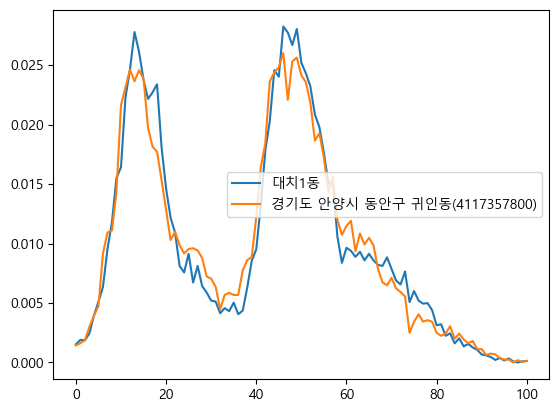

경기도 안양시 동안구 귀인동(4117357800) 0.13324800326773828


In [7]:
import csv
from unittest import result
import numpy as np
import matplotlib.pyplot as plt

a = open("./연령별인구현황_월간.csv", "r", encoding="cp949")
data = csv.reader(a)
next(data) # 첫 번째 행은 헤더이므로 건너뛰기
data = list(data) # 데이터를 리스트로 변환하여 여러 번 사용할 수 있도록 함

name = input("원하는 지역 : ")

mn = 1
mn_name = ""

for row in data:
    if name in row[0]: # 행정구역
        home = np.array(row[3:], dtype=int)/int(row[2]) # 0세부터 100세 이상까지의 인구 수를 전체 인구 수로 나누어 비율 계산

for row in data:
    other = np.array(row[3:], dtype=int)/int(row[2]) # 다른 지역의 인구 비율 계산
    s = np.sum(abs(home - other)) # 두 지역의 인구 비율 차이의 절댓값의 합 계산
    if s < mn and name not in row[0]: # 현재까지 가장 비슷한 지역과 비교하여 더 작은 차이인 경우
        mn = s
        mn_name = row[0] # 가장 비슷한 지역의 이름 저장
        result = other # 가장 비슷한 지역의 인구 비율 저장

plt.rc("font", family="Malgun Gothic") # 한글 폰트 설정
plt.plot(home, label=name) # 입력한 지역의 인구 비율 그래프
plt.plot(result, label=mn_name) # 가장 비슷한 지역의 인구 비율 그래프
plt.legend() # 범례 표시
plt.show() # 그래프 표시

print(mn_name, mn)
a.close()